# 📘 Perceptron Classifier with scikit-learn

## 📌 Introduction
In this notebook, we'll apply the Perceptron algorithm using a classic linearly separable dataset: the Iris dataset (binary version).
 We will:
 - Load and preprocess the data
 - Train a Perceptron classifier using scikit-learn
 - Evaluate its performance
 - Visualize the decision boundary

In [2]:
## 📦 Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

sns.set(style="whitegrid")

In [3]:
## 🌸 Step 2: Load and Preprocess the Iris Dataset
# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only 2 features for easy visualization (sepal length and sepal width)
y = (iris.target != 0).astype(int)  # Binary classification: class 0 vs class 1 & 2

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
## 🤖 Step 3: Train the Perceptron Model
# Train Perceptron classifier
clf = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
clf.fit(X_train_scaled, y_train)

Perceptron(eta0=0.01, random_state=42)

In [5]:
## 📊 Step 4: Evaluate the Model
# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



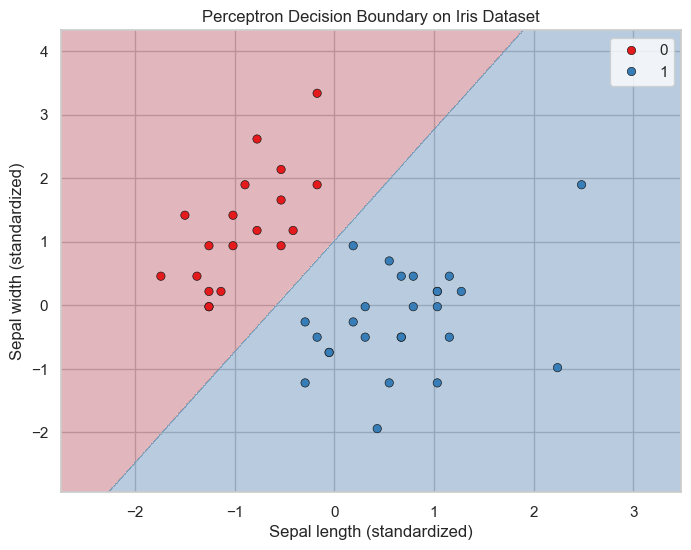

In [10]:
def plot_decision_boundary(X, y, model, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set1", edgecolor="k")
    plt.xlabel("Sepal length (standardized)")
    plt.ylabel("Sepal width (standardized)")
    plt.title(title)
    plt.show()

plot_decision_boundary(X_test_scaled, y_test, clf, "Perceptron Decision Boundary on Iris Dataset")